# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function, division
import pandas as pd



In [2]:
import pandas as pd

kc_df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(kc_df.shape)
kc_df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df = kc_df[['price', "sqft_living"]]

In [4]:
df.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [5]:
df.shape

(21613, 2)

In [14]:
from sklearn.model_selection import train_test_split

X = df['sqft_living'].values[:, np.newaxis]
y = df['price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(21613, 1) 

(10806, 1)
(10807, 1)
(10806,)
(10807,)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

model.fit(X_test, Y_test)

print("Slope Coefficient_train: ", model.coef_[0])
print("Intercept Value_train: ", model.intercept_)

print("\nSlope Coefficient_test: ", model.coef_[0])
print("Intercept Value_test: ", model.intercept_)

Slope Coefficient_train:  292.20237840760865
Intercept Value_train:  -65312.014537774725

Slope Coefficient_test:  292.20237840760865
Intercept Value_test:  -65312.014537774725


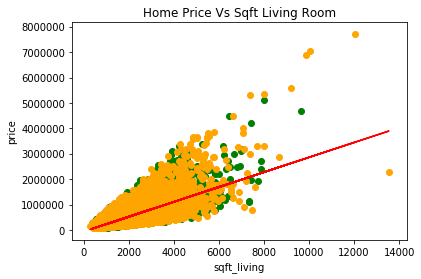

In [20]:
#lets call slope coefficient B1 m_hat
m_hat = model.coef_[0]
b_hat = model.intercept_
# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat, color = 'r')
#y_hat = [m_hat*X_test + b_hat for x in X_test]
plt.scatter(X_train, Y_train, color = "green")
plt.scatter(X_test, Y_test, color = 'orange')
plt.title("Home Price Vs Sqft Living Room")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#for the training dataset
model = LinearRegression()
model.fit(X_train, Y_train)
print("Coefficient Train: ", model.coef_)
print("Intercept train: ", model.intercept_)


#for the test dataset
model.fit(X_test, Y_test)
print("\nCoefficient Test: ", model.coef_)
print("Intercept test: ", model.intercept_)

Coefficient Train:  [268.42931803]
Intercept train:  -20631.156554488465

Coefficient Test:  [292.20237841]
Intercept test:  -65312.014537774725


In [27]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 75116601919.72325
RMSE is 274074.0810797753
R^2 is 0.49570006209082595


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [49]:
df_1 = kc_df[['price', "sqft_living", "sqft_above"]]

In [50]:
df_1.shape

(21613, 3)

In [51]:
from sklearn.model_selection import train_test_split

y = df_1.loc[:, ['price']].values
X = df_1.loc[:, ['sqft_living','sqft_above']].values

print(X.shape)
print(y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

(21613, 2)
(21613, 1)
Slope Coefficients:  [295.50374125 -18.82701076]

Intercept Value:  [-40859.96095254]


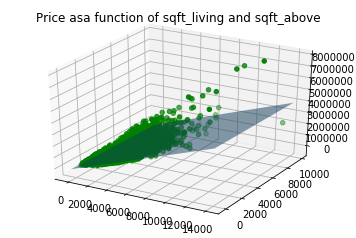

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df_1['sqft_living'], df_1['sqft_above'], df_1['price'],c='green')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Price asa function of sqft_living and sqft_above")

plt.show()

In [54]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 75217010451.62732
RMSE is 274257.1976295742
R^2 is 0.4950259632217252


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [55]:
kc_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [59]:
from sklearn.model_selection import train_test_split

y = kc_df['price']
X = kc_df.drop(['price','id', "date", "lat", "long"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train.head()

(21613, 16) 

(10806, 16)
(10807, 16)
(10806,)
(10807,)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
493,5,2.50,2820,14062,2.0,0,0,4,7,2380,440,1960,0,98034,1910,10392
4253,4,3.25,2880,35315,1.0,0,0,3,11,2270,610,1982,0,98005,1910,167378
18621,5,3.50,2450,8193,2.0,0,0,3,9,2450,0,2005,0,98028,2310,8193
1463,2,1.00,970,4284,1.0,0,0,3,7,970,0,1905,0,98103,2050,4284
12026,3,1.75,2090,8910,1.0,0,0,3,8,1230,860,1975,0,98034,2310,10695


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [-4.01207412e+04  4.44728064e+04  1.00432798e+02 -2.97911829e-02
  3.19140938e+04  5.68716970e+05  4.26128120e+04  1.70378840e+04
  1.21923087e+05  4.23935542e+01  5.80392439e+01 -3.45464186e+03
  1.05309193e+01 -3.15338268e+00  2.93212373e+01 -5.50009247e-01]

 Intercept:  6291165.895505516


In [61]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 53064398213.33327
RMSE is 230357.1101861917
R^2 is 0.6437488911869265


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
